# Tracking Objects in Video

Upto here, we have seen the following pipeline:
1. Taking the difference between 2 images
2. Applying a blur
3. Thresholding of an image
4. Morphological transformations

At the end of this pipeline, you are left with the 'contours' of the moving objects that you are trying to identify.

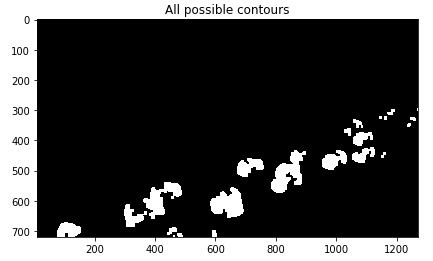
From contours, we get hulls.
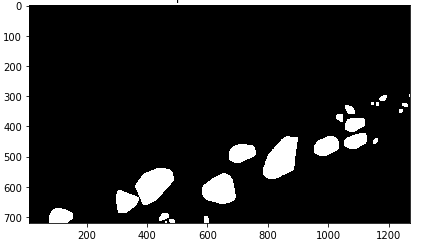
We refine hulls to get the blobs
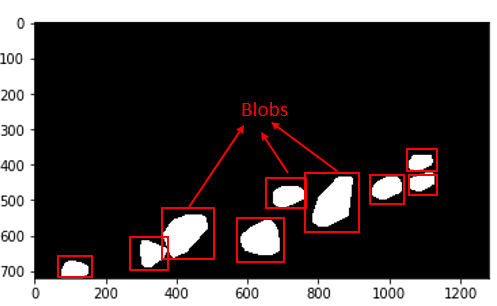

# Tracking blobs

Define 2 list of blobs :
1. **currentFrameBlobs[]** containing all the blobs in the current time frame
2. **existingBlobs[]** containing all the blobs that are being tracked from the previous timeframes at some point of time. It will also contain the blobs that was being tracked when vehicle enters the frame of video and later leaves the video frame. 

**Q. What are the 'blobs' in existingBlobs[]?** <br>
It contains all the blobs that are being tracked from the previous timeframes. When a vehicle enters a frame for the first time, we start tracking it until it leaves the window. 
Also, if a blob doesn't stay in the window for 5 consecutive frames, we stop tracking it and don't consider it as a valid blob. However, the blob remains inside the $existingBlobs[]$ list.

**Tracking steps are:**

1.	Predict the next position of a blob that is being tracked (from $existingBlobs[]$) at time ‘t’ based on the previous frames
2.	For a given blob in $currentFrameBlobs[]$, check the distance of all the predicted positions of at time ‘t’ from blobs present in $existingBlobs[]$. Then find the minimum of these distances.
3.	If this minimum distance is less than the threshold distance, we say that the given current blob is being tracked and we update its parameters so that we can track it for the next frame. 
4. Now repeat the above 3 steps for all blobs in the current frame.

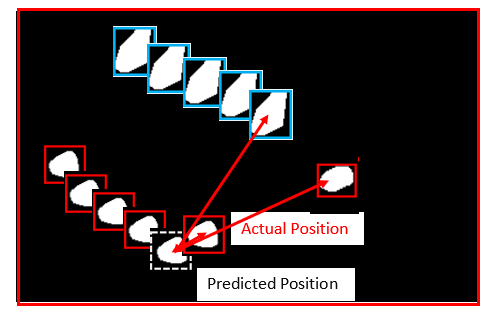

**Few more steps:**
1.	If  you find a blob for the first time in $currentFrameBlobs[]$, add this to the list of the all blobs being tracked ($existingBlobs[]$)
2.	For each blob in the blobs being tracked ($existingBlobs[]$), if a blob is not tracked for 5 consecutive frames, we make it an invalid blob. It still continues to remain in the $existingBlobs[]$ list.

**Predicting the next position**:
Predict the next position based on weighted sum of last 5 blob positions

In [ ]:
# Before tracking, make all blobs being tracked for the next timestep in the existingBlobs[] as 'false'. 
# Only if it matches with any blob in the current frame, make it true. 
# Also, predict their next position, so that we can track it. 
for blob in existingBlobs[]:
     for next timestep:  
        blnCurrentMatchFoundOrNewBlob =  False
    predict the next position for the blob

# For each blob in the current frame at timestep 't':
# Compare this blob with all blobs that are being tracked. 
for blob in currentFrameBlobs[]:
    leastDistance = 100000.0
        
    # compare with all blobs that are being tracked from the previous timestep. 
    for blob in existingBlobs[]:
        if blob already being tracked for the previous timestep == True:
            dblDistance = distance between the blobs of center positions of currentFrameBlob[] and existingBlobs[].predictedNextPosition()

            # compute the minimum distance
            if dblDistance < leastDistance:
                leastDistance = dblDistance

    # if the minimum distance is less than threshold:
    # this implies that the blob was already present in the previous timeframe
    # since the blob is already present in the list existingBlobs[],
    # we need to add the latest centre point of that particular blob. 
    # This will used to compute the distance between the blobs as we saw above.
    # Since, we need to update the particular blob, we need to know the index: intIndexOfLeastDistance. 
    # We also need to update the latest data points like rectangles size, diagonal size, blnCurrentMatchFoundOrNewBlob=True etc. 
    if leastDistance < threshold:
        update blob parameters in existingBlobs[] being tracked
        # Examples of blob parameters: area, center position, etc.

    # if you cannot find a blob that has distance less than threshold
    # this means that this may be a new blob that has entered the current frame. 
    # So, we will add the blob to the list of existingBlobs[]. 
    # At the next frame, we will also track this blob. 
    else:
        add new blob to the existingBlobs[]
    
# Now, we need to remove the blobs that is not being tracked(moving). 
# It may be some vehicles that has entered the frame and then stopped. 
for blob in existingBlobs:
    # In the list of blobs being tracked, existingBlob[], if you do not find a blob in currentFrameBlob[], means that 
    # either the vehicle has stopped or it is being occluded. So, if the vehicle cannot be tracked for 5 timeframes, 
    # remove it from the list of existingBlobs[]. 
   
    if number of frames for which existingBlob not being tracked  >= 5:
        existingBlob.blnStillBeingTracked = False # using this variable, we will not track it henceforth
